# Sparse logistic regression

Consider a dataset of $M$ rows and $N$ columns, so that $\mathbf{A} = \text{col}(\mathbf{a}^\top_i)_{i =1}^M \in \mathbb{R}^{M \times N}$ is the dataset matrix, and $\mathbf{a}_i \in \mathbb{R}^{N}$ is the $i$-th features vector for the $i$-th dataset row. Moreover, let $\mathbf{b} \in \mathbb{R}^M$ be the target vector, so that $b_i \in \{-1,1\}$ is the (binary) ground truth for the $i$-th data entry. 
The sparse logistic regression consists of finding the weight vector $\mathbf{x} \in \mathbb{R}^N$ that minimizes the following loss function [1]

$$
\begin{align}
    \label{eq:regression}
        f(\mathbf{x}) := \sum_{i = 1}^M \log\left(1 + \frac{1}{\exp(b_i \mathbf{a}^\top_i \mathbf{x})} \right) + \gamma \|\mathbf{x}\|_1
        \\ \nonumber
        = \underbrace{\mathbf{1}^\top_M \log(1 + \exp(-\mathbf{b} \odot \mathbf{A} \mathbf{x}))}_{=:s(\mathbf{x})} + \underbrace{\gamma \|\mathbf{x}\|_1}_{=:g(\mathbf{x})} 
\end{align}
$$

where $\gamma \in \mathbb{R}_{> 0}$ is the $\ell_1$-regulation strength. The gradient for $s(\cdot)$, $\nabla s_\mathbf{x}(\mathbf{x})$, is calculated as

$$
\begin{equation}
    F(\mathbf{x}) = \nabla s_\mathbf{x}(\mathbf{x}) = -\frac{\mathbf{A}^\top \odot (\mathbf{1}_N \otimes \mathbf{b}^\top) \odot \exp(-\mathbf{b} \odot \mathbf{A} \mathbf{x})}{1 + \exp(-\mathbf{b} \odot \mathbf{A} \mathbf{x})} \mathbf{1}_M
\end{equation}
$$

The problem of finding the minimizer for $\eqref{eq:regression}$ can be cast as a canonical VI, with $F(\mathbf{x}) := \nabla s_\mathbf{x}(\mathbf{x})$. 

## References
[1] Mishchenko, K. (2023). Regularized Newton method with global convergence. SIAM Journal on Optimization, 33(3), 1440-1462.


Using: eg
Using: popov
Using: fbf
Using: frb
Using: prg
Using: eag
Using: arg
Using: fogda
Using: graal
Using: agraal
Using: hgraal_1
Using: hgraal_2


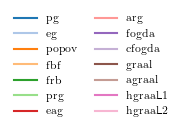

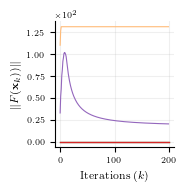

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from utils import *
from monviso import VI

np.random.seed(2024)

N, M = 500, 200

# Train matrix, target vector, and regularization strength
A = np.random.normal(size=(M, N))
b = np.random.choice([-1, 1], size=M)
gamma = 0.005 * np.linalg.norm(A.T @ b, np.inf)

# VI mapping
F = lambda x: -np.sum(
    (A.T * np.tile(b, (N, 1))) * np.exp(-b * (A @ x)) / (1 + np.exp(-b * (A @ x))),
    axis=1,
)
g = lambda x: gamma * cp.norm(x, 1)
L = 1.5

# Define the VI problem
slr = VI(N, F, g)

# Initial points
x0 = [np.random.rand(N) for _ in range(2)]

# Solve the VI using the available algorithms
max_iter = 200
for algorithm, params in cases(x0, L, excluded={"pg", "cfogda"}).items():
    print(f"Using: {algorithm}")
    sol = slr.solution(
        algorithm,
        params,
        max_iter,
        log_path=f"logs/logistic-regression/{algorithm}.log",
    )

plot_results(
    "logs/logistic-regression",
    "figs/logistic-regression.pdf",
    r"$\|F(\mathbf{x}_k))\|$",
)
